<a href="https://colab.research.google.com/github/rafikiels/Related-Projects/blob/main/Machine_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For this exercise, you will use the dataset forums.pkl which can be found on Github repo in the assignments folder, under Assignment 01.

Business Problem:  Your analytics firm was hired by the news company Hooli.  Hooli recently acquired a popular web-based user forum, and now they need help reimagining the product on their platform.  In short, the user forum was a single message board, and all of the users' posts were displayed in the same location.   

Before they launch the product on their platform, Hooli has an idea that they want to explore.  They want the forum product to be categorized based on the theme of the discussion, but they aren't sure how to reason about evaluating that idea.  Because Hooli does not have the in-house analytical skills, they hired your firm to review their database (forums.pkl) and provide recommendations on how to they should think about creating a categorized user forum.  They are primarily looking for guidance on how many categories they should establish on the forum, but any other recommendations that you might have, while optional, would be welcomed.

Hooli has asked that you prepare an Executive Summary of your ideas on how to solve their problem.  They also noted that the previous company used an in-house system to store the message details as set of numbers.  That is, each message is represented by 300 columns of numeric values.  This is important because Hooli intends to keep this system in place.  As such, Hooli expects that you will only use the numeric features for this task, but provided you the message in case it helped provide context.  Hooli is unable to provide any additional details on the database that they have provided your firm.

This Executive Summary should be a PDF, contain no more than 3 pages with charts/tables, if they are included. 

In this report, you should consider the following:

Outline your analytical workflow overall, starting with exploration of the data and any decisions you elect to make around data cleaning, feature engineering, etc.
Discuss any decisions that you made, with attention to the rationale as to what drove your findings
Discuss the technique(s) that you ultimately decided to use, why the technique(s) where selected, but keep in mind, you audience is not as technical as you
Include any visualizations or charts that can help support your findings or act as evidence supporting the findings that you want to present to Hooli to help frame your findings and recommendations
This an executive summary that should include findings for your client Hooli.  You will be evaluated on your ability to work through the dataset in python, the quality of your analysis, as well as the ability to clearly articulate the logic (and rationale) that drove the findings that you are suggesting to the Hooli executive team. 

Submission:

1. PDF Executive Summary of no more than 3 pages

2. Python script (not a notebook, but a .py file) that can be executed without error

Notes and Tips:

1.  You are not expected to analyze the text.  That will happen in the second half of this course, but the text is provided to you in case it helps provide context for your analysis.

2.  In the Github repo, there is a README.md file that has code snippets to help you read in the pickle file as well as a code snippet to help you resolve a Recursion error, which could happen depending on your analytical approach.

In [ ]:
import sys
sys.setrecursionlimit(10000)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# what we need for today
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster

from sklearn import metrics 
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [ ]:

from google.colab import auth
auth.authenticate_user()

In [ ]:
import pandas as pd
forums = pd.read_pickle("forums.pkl")

As a consultant, I will check the dataset to see what I am working with.

In [ ]:
forums.head()

,text,e0,e1,e2,e3,e4,e5,e6,e7,e8,e9,e10,e11,e12,e13,e14,e15,e16,e17,e18,e19,e20,e21,e22,e23,e24,e25,e26,e27,e28,e29,e30,e31,e32,e33,e34,e35,e36,e37,e38,...,e260,e261,e262,e263,e264,e265,e266,e267,e268,e269,e270,e271,e272,e273,e274,e275,e276,e277,e278,e279,e280,e281,e282,e283,e284,e285,e286,e287,e288,e289,e290,e291,e292,e293,e294,e295,e296,e297,e298,e299
0,,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Didn't one of the early jet fighters have thes...,-0.032947,0.120877,-0.075873,-0.076834,-0.005793,0.006867,-0.043206,-0.026466,0.005214,1.907945,-0.135624,-0.062458,0.180738,-0.052792,-0.112068,-0.094906,-0.058292,0.925477,-0.195314,-0.096061,0.101925,-0.082855,0.006994,-0.038338,-0.033810,-0.039732,-0.139992,-0.066728,0.034825,0.020084,0.008877,0.184964,-0.025921,0.038143,0.043888,-0.032762,-0.027003,0.014210,-0.053745,...,0.126231,0.071095,-0.075111,0.115938,-0.015536,-0.077773,0.088924,0.102531,0.201341,0.044122,0.067551,-0.001091,-0.096911,-0.197282,-0.017801,0.012893,0.013307,-0.047528,0.042391,0.168364,0.115843,0.041067,-0.038168,-0.023813,0.023672,-0.068672,0.146988,-0.018054,0.042926,-0.021354,-0.207951,0.015210,0.031759,-0.070944,0.075598,-0.020428,-0.045896,-0.004107,0.052477,0.120896
2,"I bought my HP48sx calculator a month ago, use...",-0.057366,0.190520,-0.100694,-0.121314,0.073766,-0.007092,-0.047218,-0.166004,0.072910,1.741046,-0.153936,0.140352,0.100912,-0.049860,-0.134963,-0.088621,-0.058889,1.308386,-0.195159,-0.052336,-0.044629,0.014204,-0.065091,0.023001,-0.039652,0.013889,-0.142640,-0.092199,0.129611,-0.018354,-0.037673,0.015572,0.020485,0.070266,0.017717,-0.056587,-0.013531,0.049982,-0.015892,...,0.158629,0.165701,-0.031994,0.068091,0.033599,-0.132217,-0.041000,0.046424,0.312258,-0.035618,0.086219,-0.046396,-0.042239,-0.123918,-0.085084,0.008155,-0.030246,0.084753,-0.052698,0.070031,0.109990,0.026190,0.035990,0.011031,-0.034554,-0.064828,0.061365,-0.130528,0.055790,0.007981,-0.219416,-0.006750,-0.009741,-0.039333,-0.042368,-0.059894,-0.006622,-0.090851,0.045055,0.062297
3,I would guess not. Dr. Neil Gehrels of CGRO i...,-0.032504,0.165183,-0.101052,-0.018943,0.060833,0.039176,-0.045718,-0.111591,-0.028218,1.822938,-0.175586,0.025552,0.035184,-0.025928,-0.156750,-0.023870,-0.019415,0.914038,-0.128891,-0.079474,-0.007369,-0.029707,-0.087325,-0.019550,0.078966,0.027958,-0.045214,0.015733,0.044442,0.046478,-0.015090,0.049868,-0.038387,0.027870,0.036532,-0.072025,-0.002921,-0.002192,-0.048910,...,0.091327,0.144645,-0.023602,0.113932,0.043154,-0.119667,-0.037267,0.007292,0.171957,-0.006867,0.034454,0.039677,-0.058977,-0.109854,-0.113039,0.008090,-0.023378,0.034989,0.030655,0.128876,0.208883,0.011201,0.027053,-0.080429,-0.023358,-0.087635,0.106090,-0.080074,0.046319,-0.035677,-0.157370,0.041819,0.030946,-0.029487,0.051459,0.040399,-0.025781,-0.011279,0.002328,0.011600
4,Okay all my friends are bitching at me that th...,-0.047674,0.158548,-0.155047,-0.043119,0.045485,0.017984,0.045940,-0.143726,-0.023209,1.528188,-0.172064,0.058078,0.078922,-0.066865,-0.123843,-0.030299,-0.075125,1.027720,-0.151964,-0.023864,-0.014664,-0.034397,-0.032310,-0.046880,0.026197,0.045692,-0.079695,-0.080282,0.103836,-0.059779,-0.031303,0.083876,-0.018506,0.060413,0.043662,-0.019501,0.013664,0.060732,-0.094687,...,0.028854,0.109690,0.044476,0.058854,0.024214,-0.104301,-0.014371,0.

2. I want to make sure that there aren't any missing values in my dataset and this is the most effective way to check it.

In [ ]:
forums.isnull().values.any()

False

I am checking to see the shape and size of my dataframe

In [ ]:
forums.shape

(2362, 301)

I am checking to see weather or not I should scale my data and I feel like because the mean and standard deviation are relatively close, I will not scale my data.

In [ ]:
forums.describe().T

,count,mean,std,min,25%,50%,75%,max
e0,2362.0,-0.036640,0.053403,-0.622081,-0.061371,-0.033798,-0.006447,0.197311
e1,2362.0,0.163215,0.061718,-0.196960,0.131496,0.164683,0.197972,0.533470
e2,2362.0,-0.115132,0.069041,-0.490025,-0.160102,-0.120600,-0.074470,0.363830
e3,2362.0,-0.060126,0.051435,-0.393122,-0.086950,-0.058435,-0.028660,0.322405
e4,2362.0,0.079223,0.054175,-0.163500,0.045786,0.077486,0.111677,0.390160
...,...,...,...,...,...,...,...,...
e295,2362.0,-0.014235,0.050015,-0.352770,-0.039663,-0.011493,0.014425,0.263430
e296,2362.0,-0.043050,0.045704,-0.562870,-0.069286,-0.043942,-0.016664,0.237821
e297,2362.0,-0.069588,0.049375,-0.581665,-0.097183,-0.070118,-0.040897,0.179845
e298,2362.0,0.001749,0.057523,-0.501450,-0.026111,0.003832,0.034465,0.226430


This is optional but I wanted to extract the column and skim the forums for context.

I extracted the text column to investigate it independently. I want to guage the type of discussions that people where having in the forum to identify the best method to categories my data for my client. 

In [ ]:
text = forums['text'].iloc[0:2362]


Removing html and metadata tags from dataframe by creating a new column with the discussions w/o "<>"

Hirerarchial clustering, Kmean and Elbow method to identify the number of clusters for my dataset. 

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics import pairwise_distances 
from sklearn.preprocessing import StandardScaler

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

Hirearchial Clustering

In [ ]:
col = forums.select_dtypes('number')
col

,e0,e1,e2,e3,e4,e5,e6,e7,e8,e9,e10,e11,e12,e13,e14,e15,e16,e17,e18,e19,e20,e21,e22,e23,e24,e25,e26,e27,e28,e29,e30,e31,e32,e33,e34,e35,e36,e37,e38,e39,...,e260,e261,e262,e263,e264,e265,e266,e267,e268,e269,e270,e271,e272,e273,e274,e275,e276,e277,e278,e279,e280,e281,e282,e283,e284,e285,e286,e287,e288,e289,e290,e291,e292,e293,e294,e295,e296,e297,e298,e299
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.032947,0.120877,-0.075873,-0.076834,-0.005793,0.006867,-0.043206,-0.026466,0.005214,1.907945,-0.135624,-0.062458,0.180738,-0.052792,-0.112068,-0.094906,-0.058292,0.925477,-0.195314,-0.096061,0.101925,-0.082855,0.006994,-0.038338,-0.033810,-0.039732,-0.139992,-0.066728,0.034825,0.020084,0.008877,0.184964,-0.025921,0.038143,0.043888,-0.032762,-0.027003,0.014210,-0.053745,-0.031799,...,0.126231,0.071095,-0.075111,0.115938,-0.015536,-0.077773,0.088924,0.102531,0.201341,0.044122,0.067551,-0.001091,-0.096911,-0.197282,-0.017801,0.012893,0.013307,-0.047528,0.042391,0.168364,0.115843,0.041067,-0.038168,-0.023813,0.023672,-0.068672,0.146988,-0.018054,0.042926,-0.021354,-0.207951,0.015210,0.031759,-0.070944,0.075598,-0.020428,-0.045896,-0.004107,0.052477,0.120896
2,-0.057366,0.190520,-0.100694,-0.121314,0.073766,-0.007092,-0.047218,-0.166004,0.072910,1.741046,-0.153936,0.140352,0.100912,-0.049860,-0.134963,-0.088621,-0.058889,1.308386,-0.195159,-0.052336,-0.044629,0.014204,-0.065091,0.023001,-0.039652,0.013889,-0.142640,-0.092199,0.129611,-0.018354,-0.037673,0.015572,0.020485,0.070266,0.017717,-0.056587,-0.013531,0.049982,-0.015892,0.003776,...,0.158629,0.165701,-0.031994,0.068091,0.033599,-0.132217,-0.041000,0.046424,0.312258,-0.035618,0.086219,-0.046396,-0.042239,-0.123918,-0.085084,0.008155,-0.030246,0.084753,-0.052698,0.070031,0.109990,0.026190,0.035990,0.011031,-0.034554,-0.064828,0.061365,-0.130528,0.055790,0.007981,-0.219416,-0.006750,-0.009741,-0.039333,-0.042368,-0.059894,-0.006622,-0.090851,0.045055,0.062297
3,-0.032504,0.165183,-0.101052,-0.018943,0.060833,0.039176,-0.045718,-0.111591,-0.028218,1.822938,-0.175586,0.025552,0.035184,-0.025928,-0.156750,-0.023870,-0.019415,0.914038,-0.128891,-0.079474,-0.007369,-0.029707,-0.087325,-0.019550,0.078966,0.027958,-0.045214,0.015733,0.044442,0.046478,-0.015090,0.049868,-0.038387,0.027870,0.036532,-0.072025,-0.002921,-0.002192,-0.048910,-0.013426,...,0.091327,0.144645,-0.023602,0.113932,0.043154,-0.119667,-0.037267,0.007292,0.171957,-0.006867,0.034454,0.039677,-0.058977,-0.109854,-0.113039,0.008090,-0.023378,0.034989,0.030655,0.128876,0.208883,0.011201,0.027053,-0.080429,-0.023358,-0.087635,0.106090,-0.080074,0.046319,-0.035677,-0.157370,0.041819,0.030946,-0.029487,0.051459,0.040399,-0.025781,-0.011279,0.002328,0.011600
4,-0.047674,0.158548,-0.155047,-0.043119,0.045485,0.017984,0.045940,-0.143726,-0.023209,1.528188,-0.172064,0.058078,0.078922,-0.066865,-0.123843,-0.030299,-0.075125,1.027720,-0.151964,-0.023864,-0.014664,-0.034397,-0.032310,-0.046880,0.026197,0.045692,-0.079695,-0.080282,0.103836,-0.059779,-0.031303,0.083876,-0.018506,0.060413,0.043662,-0.019501,0.013664,0.060732,-0.094687,-0.035022,...,0.028854,0.109690,0.044476,0.058854,0.024214,-0.104301,-0.014371,0.057352,0.323679,0.020905,0.011569,-0.031873,-0.055304,-0.077892,-0.085037,0.023245,0.027337,0.000982,-0.036770,0.161076,0.163029,0.021581,0.028227,-0.07354

Creating a distance matrix 

In [ ]:
d1 = pdist(col)
d1

array([2.88916056, 2.93393155, 2.56625832, ..., 2.26116335, 1.08378738,
       2.00790776])

In [ ]:
z = linkage(d1, 'ward')
type(z)

numpy.ndarray

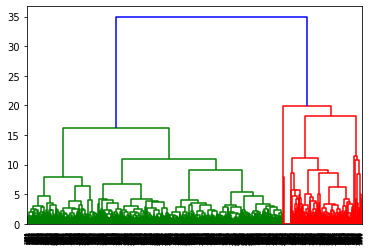

In [ ]:
dendrogram(z, labels=forums.index)
plt.show()

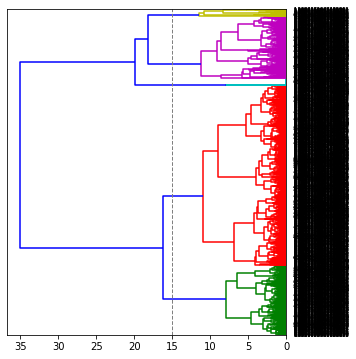

In [ ]:
DIST = 15
plt.figure(figsize=(5,6))
dendrogram(z, 
           labels = d1,
           orientation = "left", 
           color_threshold = DIST)
plt.axvline(x=DIST, c='grey', lw=1, linestyle='dashed')
plt.show()

Creating a cluster

In [ ]:
fcluster(z, 3, criterion="maxclust")
forums['cluster1'] = fcluster(z, 3, criterion="maxclust")
forums.head(3)

,text,e0,e1,e2,e3,e4,e5,e6,e7,e8,e9,e10,e11,e12,e13,e14,e15,e16,e17,e18,e19,e20,e21,e22,e23,e24,e25,e26,e27,e28,e29,e30,e31,e32,e33,e34,e35,e36,e37,e38,...,e261,e262,e263,e264,e265,e266,e267,e268,e269,e270,e271,e272,e273,e274,e275,e276,e277,e278,e279,e280,e281,e282,e283,e284,e285,e286,e287,e288,e289,e290,e291,e292,e293,e294,e295,e296,e297,e298,e299,cluster1
0,,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2
1,Didn't one of the early jet fighters have thes...,-0.032947,0.120877,-0.075873,-0.076834,-0.005793,0.006867,-0.043206,-0.026466,0.005214,1.907945,-0.135624,-0.062458,0.180738,-0.052792,-0.112068,-0.094906,-0.058292,0.925477,-0.195314,-0.096061,0.101925,-0.082855,0.006994,-0.038338,-0.033810,-0.039732,-0.139992,-0.066728,0.034825,0.020084,0.008877,0.184964,-0.025921,0.038143,0.043888,-0.032762,-0.027003,0.014210,-0.053745,...,0.071095,-0.075111,0.115938,-0.015536,-0.077773,0.088924,0.102531,0.201341,0.044122,0.067551,-0.001091,-0.096911,-0.197282,-0.017801,0.012893,0.013307,-0.047528,0.042391,0.168364,0.115843,0.041067,-0.038168,-0.023813,0.023672,-0.068672,0.146988,-0.018054,0.042926,-0.021354,-0.207951,0.01521,0.031759,-0.070944,0.075598,-0.020428,-0.045896,-0.004107,0.052477,0.120896,1
2,"I bought my HP48sx calculator a month ago, use...",-0.057366,0.190520,-0.100694,-0.121314,0.073766,-0.007092,-0.047218,-0.166004,0.072910,1.741046,-0.153936,0.140352,0.100912,-0.049860,-0.134963,-0.088621,-0.058889,1.308386,-0.195159,-0.052336,-0.044629,0.014204,-0.065091,0.023001,-0.039652,0.013889,-0.142640,-0.092199,0.129611,-0.018354,-0.037673,0.015572,0.020485,0.070266,0.017717,-0.056587,-0.013531,0.049982,-0.015892,...,0.165701,-0.031994,0.068091,0.033599,-0.132217,-0.041000,0.046424,0.312258,-0.035618,0.086219,-0.046396,-0.042239,-0.123918,-0.085084,0.008155,-0.030246,0.084753,-0.052698,0.070031,0.109990,0.026190,0.035990,0.011031,-0.034554,-0.064828,0.061365,-0.130528,0.055790,0.007981,-0.219416,-0.00675,-0.009741,-0.039333,-0.042368,-0.059894,-0.006622,-0.090851,0.045055,0.062297,1


In [ ]:
forums.describe().T

,count,mean,std,min,25%,50%,75%,max
e0,2362.0,-0.036640,0.053403,-0.622081,-0.061371,-0.033798,-0.006447,0.197311
e1,2362.0,0.163215,0.061718,-0.196960,0.131496,0.164683,0.197972,0.533470
e2,2362.0,-0.115132,0.069041,-0.490025,-0.160102,-0.120600,-0.074470,0.363830
e3,2362.0,-0.060126,0.051435,-0.393122,-0.086950,-0.058435,-0.028660,0.322405
e4,2362.0,0.079223,0.054175,-0.163500,0.045786,0.077486,0.111677,0.390160
...,...,...,...,...,...,...,...,...
e296,2362.0,-0.043050,0.045704,-0.562870,-0.069286,-0.043942,-0.016664,0.237821
e297,2362.0,-0.069588,0.049375,-0.581665,-0.097183,-0.070118,-0.040897,0.179845
e298,2362.0,0.001749,0.057523,-0.501450,-0.026111,0.003832,0.034465,0.226430
e299,2362.0,0.071648,0.056952,-0.338469,0.036120,0.070735,0.107824,0.269688


Performing a Kmean clustering!

In [ ]:
from scipy.cluster.vq import kmeans, vq

In [ ]:
k3 = KMeans(3, random_state=820)
k3.fit(col)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=820, tol=0.0001, verbose=0)

In [ ]:
k3_labs = k3.predict(col)
k3_labs

array([1, 0, 0, ..., 0, 2, 0], dtype=int32)

In [ ]:
k3.n_iter_

6

In [ ]:
forums['k3'] = k3_labs
forums.sample(3)

,text,e0,e1,e2,e3,e4,e5,e6,e7,e8,e9,e10,e11,e12,e13,e14,e15,e16,e17,e18,e19,e20,e21,e22,e23,e24,e25,e26,e27,e28,e29,e30,e31,e32,e33,e34,e35,e36,e37,e38,...,e262,e263,e264,e265,e266,e267,e268,e269,e270,e271,e272,e273,e274,e275,e276,e277,e278,e279,e280,e281,e282,e283,e284,e285,e286,e287,e288,e289,e290,e291,e292,e293,e294,e295,e296,e297,e298,e299,cluster1,k3
310,-- jamiller@kuhub.cc.ukans.eduJames Miller,-0.201180,0.365677,0.034884,0.135097,0.032797,0.056797,0.036887,0.036899,-0.074033,0.850047,-0.096280,-0.027007,0.010493,-0.204627,-0.206170,-0.114987,0.206963,0.468240,-0.163360,-0.025574,0.177270,0.064920,-0.081655,-0.065740,0.033890,-0.099578,-0.216710,0.108994,0.072412,0.107306,-0.052743,0.164810,-0.053391,-0.141667,-0.028010,0.249523,0.035192,0.080376,-0.201423,...,-0.122171,0.279040,-0.113531,-0.189577,0.027026,0.033529,0.012830,0.050497,-0.342330,0.129240,0.106457,-0.026703,-0.165887,-0.171436,0.083580,-0.157357,0.038370,0.065841,0.002601,-0.089200,-0.188486,-0.111393,0.203637,-0.079003,0.047384,0.087802,0.022733,-0.059971,-0.089860,-0.102788,0.050123,0.025391,-0.019897,-0.046786,0.081601,-0.076818,-0.110567,-0.118883,3,1
180,Greetings:Here is a list of items for the 3B1 ...,-0.050153,0.170985,-0.097281,0.001446,0.115432,0.031722,0.011882,-0.136906,0.025550,1.365862,-0.143763,0.081157,0.051669,-0.074086,-0.096619,-0.055745,-0.086153,1.228402,-0.107585,-0.051250,-0.039892,0.013419,-0.035984,-0.000579,0.045134,0.020269,-0.041566,-0.038511,0.140574,-0.033243,-0.061990,0.013718,0.008650,0.094348,0.041468,-0.033276,0.001117,0.067246,-0.067554,...,0.080617,0.066237,0.012150,-0.131299,-0.043516,0.021259,0.321998,-0.045243,-0.004807,-0.039517,0.007973,-0.098818,-0.121644,0.009849,0.060709,0.017014,-0.029712,0.084769,0.181710,-0.002709,0.101955,-0.052484,0.006359,-0.143475,0.052301,-0.083377,0.083406,-0.050410,-0.187954,0.037964,-0.019430,0.005397,-0.053160,-0.025381,-0.012702,-0.112306,0.003893,0.057098,1,2
376,Original to: keithley@apple.comG'day keithley@...,-0.056717,0.136070,-0.040344,-0.044422,0.066285,0.036045,-0.027720,-0.070855,0.016447,1.497833,-0.180853,0.026335,0.028759,0.029258,-0.104253,-0.017077,-0.077642,1.139894,-0.172629,-0.042423,0.015540,0.037404,-0.065606,-0.055778,0.011511,0.005551,-0.054022,-0.018205,0.129575,0.032349,-0.059872,-0.005078,0.034903,0.078305,0.060784,-0.037251,0.013010,0.045498,0.035313,...,0.025958,0.100090,-0.004606,-0.196444,0.030709,0.042697,0.267926,-0.034998,0.021946,0.074303,-0.035552,-0.061254,-0.095756,0.000658,0.021230,-0.001216,-0.019791,0.112182,0.095030,0.044917,0.026481,-0.014722,0.023782,-0.075041,0.033955,-0.066139,0.120280,0.072910,-0.078022,0.020527,0.022868,-0.030247,-0.001169,-0.009428,-0.040691,-0.027772,-0.050289,0.098291,1,2


In [ ]:
forums.k3.value_counts()

0    1664
2     597
1     101
Name: k3, dtype: int64

In [ ]:
k3group = forums.groupby("k3").mean()

In [ ]:
k3.cluster_centers_

test_centers = k3.cluster_centers_
test_centers.shape

(3, 300)

In [ ]:
k3.inertia_

2485.8084925781836

In [ ]:
KRANGE = range(2, 11)

# a container
ss = []

for k in KRANGE:
    km = KMeans(k)
    lab = km.fit_predict(col)
    ss.append(km.inertia_)


Text(0, 0.5, 'Inertia')

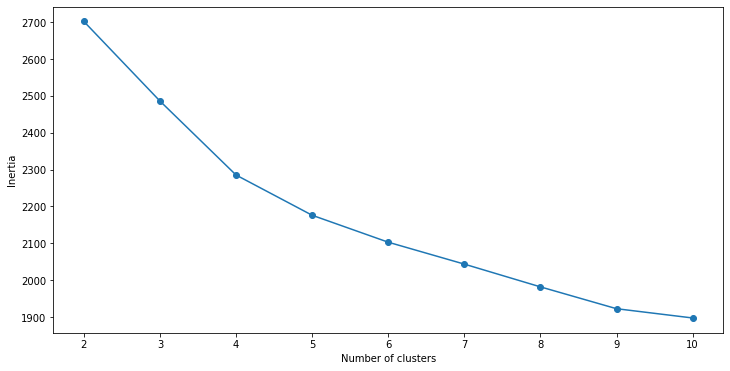

In [ ]:
frame = pd.DataFrame({'k':range(2,11), 'SS':ss})
plt.figure(figsize=(12,6))
plt.plot(frame['k'], frame['SS'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [ ]:
# import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# what we need for today
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster

from sklearn import metrics 
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

! pip install scikit-plot
import scikitplot as skplt

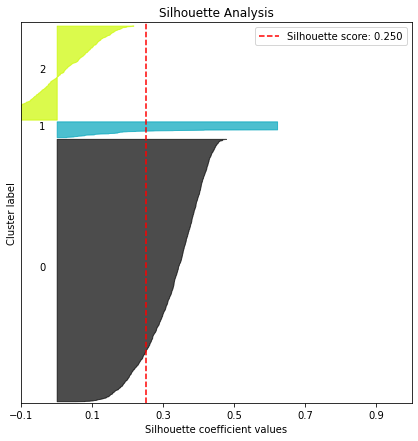

In [ ]:
k3.inertia_

silo_overall = metrics.silhouette_score(col, k3.predict(col))
silo_overall

# samples
silo_samples = metrics.silhouette_samples(col, k3.predict(col))
silo_samples.shape

# plotting
skplt.metrics.plot_silhouette(col, k3.predict(col), figsize=(7,7))
plt.show()

The Silhouette coefficient of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters.

My score is low and a value closer to one is always good.Meaning there might be data points that are wrongly assigned to the clusters given a low score or not the best representation of the cluster assignment overall.When k=3 cluser label 0 takes up most of the size taking over the grouping. The silhouette score when k=5 is uneven, with 0 owning and 3 being above average. 

In [ ]:
k5 = KMeans(5, random_state=820)
k5.fit(col)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=820, tol=0.0001, verbose=0)

In [ ]:
k5_labs = k5.predict(col)
k5_labs

array([1, 0, 3, ..., 0, 2, 0], dtype=int32)

In [ ]:
k5.n_iter_

29

In [ ]:
forums['k5'] = k5_labs
forums.sample(3)

,text,e0,e1,e2,e3,e4,e5,e6,e7,e8,e9,e10,e11,e12,e13,e14,e15,e16,e17,e18,e19,e20,e21,e22,e23,e24,e25,e26,e27,e28,e29,e30,e31,e32,e33,e34,e35,e36,e37,e38,...,e263,e264,e265,e266,e267,e268,e269,e270,e271,e272,e273,e274,e275,e276,e277,e278,e279,e280,e281,e282,e283,e284,e285,e286,e287,e288,e289,e290,e291,e292,e293,e294,e295,e296,e297,e298,e299,cluster1,k3,k5
754,I know someone had long talks about Solar Sail...,0.023901,0.175235,-0.154610,-0.023246,0.087167,-0.051358,0.004003,-0.089587,0.010824,2.247341,-0.101230,0.025711,0.104625,-0.097171,-0.131106,-0.062991,-0.072401,0.851165,-0.131313,-0.066104,0.026385,-0.067995,-0.061847,0.034066,-0.013114,0.018468,-0.078913,-0.071126,0.070053,-0.004804,-0.062985,0.070986,-0.059262,0.030853,0.008640,-0.029213,-0.004303,-0.010918,-0.031631,...,0.147210,0.123784,-0.079874,-0.057098,0.046779,0.233949,-0.037068,0.155967,-0.023679,-0.111189,-0.134320,-0.068576,0.054081,0.005614,0.071068,0.034962,0.154708,0.166896,0.085440,-0.024627,-0.015106,0.021006,-0.042899,0.178162,-0.070418,0.085081,0.063511,-0.172554,0.027801,0.022473,-0.086399,0.073699,-0.015469,-0.092355,-0.015046,0.070765,0.079904,1,0,0
737,As an Amateur Radio operator (VHF 2metres) I l...,-0.021311,0.139397,-0.155778,-0.038488,0.098881,0.025977,-0.046584,-0.119444,-0.005652,1.850560,-0.179851,0.063842,0.082265,-0.109804,-0.123950,-0.036103,-0.073715,1.160652,-0.207872,-0.078038,0.032896,-0.069350,-0.052264,0.056949,0.047650,0.029720,-0.105346,-0.081216,0.084062,0.026502,-0.018448,0.080845,-0.044665,0.062845,0.071381,-0.075359,0.000938,0.046075,-0.045076,...,0.092531,0.053000,-0.166951,-0.034844,0.001832,0.310021,0.026900,0.063181,0.005624,-0.098881,-0.091286,-0.036610,-0.019142,-0.026794,0.017684,-0.018784,0.135883,0.140726,0.023987,0.017443,-0.050210,0.011959,-0.080781,0.154037,-0.077882,0.104065,0.017121,-0.188370,0.029016,0.058038,-0.031426,-0.009697,0.003513,-0.046060,-0.058381,0.020600,0.078781,1,0,0
2213,**********************************************...,-0.009174,0.236399,-0.154203,-0.041162,0.200043,0.123238,-0.089797,-0.172812,0.015045,0.938032,-0.041087,0.073794,-0.147595,-0.073570,0.035490,-0.109499,-0.032907,1.380924,-0.232809,0.019055,-0.036326,0.106438,-0.300621,-0.140518,0.182322,-0.020070,0.024979,0.011227,0.130233,-0.114346,0.017575,0.140637,-0.048134,-0.134127,0.106260,-0.177245,0.102762,0.136758,-0.182485,...,-0.104717,-0.067042,-0.080184,-0.067403,-0.051572,0.623533,-0.302279,-0.150498,-0.208287,-0.011683,-0.093885,-0.159437,-0.050465,0.077065,0.161332,-0.182347,0.185899,0.160905,0.067380,0.117365,-0.177528,-0.070776,-0.038697,0.023898,-0.061122,0.265107,-0.096400,-0.233299,0.247497,-0.273351,-0.176727,-0.138296,0.007330,0.000721,0.034152,0.160526,0.100050,3,2,2


In [ ]:
k5_labs = k5.predict(col)
k5_labs

k5 = KMeans(5)
j = forums.copy()
del j['k3']

forums['k5'] = k5.fit_predict(col)


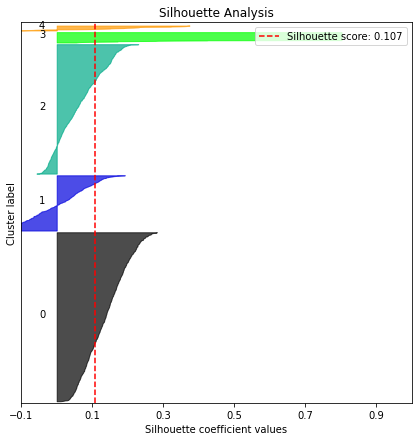

In [ ]:
# silo scores - k5
k5.inertia_

# silo score from sklearn --- metrics module

silo_overall = metrics.silhouette_score(col, k5.predict(col))
silo_overall


# silo samples
silo_samples = metrics.silhouette_samples(col, k5.predict(col))
type(silo_samples)
silo_samples.shape

# plot up the the fit
skplt.metrics.plot_silhouette(col, k5.predict(col), figsize=(7,7))
plt.show()


PCA

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# what we need for today
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics 

import scikitplot as skplt

# color maps
from matplotlib import cm

In [ ]:
pca = PCA()
pcs = pca.fit_transform(col)
type(pcs)
pcs.shape

(2362, 300)

In [ ]:
pcs[:10, :10]

array([[ 2.03429272, -1.17243078,  0.36959375,  0.38420287,  0.43778131,
        -0.27601408,  0.02535675,  0.11639032,  0.01773941,  0.00206311],
       [-0.49430915, -0.32030005,  0.19649756,  0.06132518, -0.07975289,
         0.05277804,  0.13699358,  0.10136627, -0.00719651,  0.20552498],
       [-0.29588479,  0.10525277, -0.42188026, -0.25631909,  0.04112736,
         0.02106502,  0.04831346,  0.3351935 ,  0.02895308, -0.04729899],
       [-0.10804646, -0.25473973,  0.02017198,  0.20093113, -0.26072609,
         0.0409392 , -0.0832812 , -0.10815929, -0.04537332,  0.11547084],
       [ 0.00678716,  0.09809265,  0.16119983, -0.07722827,  0.25427456,
        -0.06916941,  0.00336252, -0.02755651, -0.03930111, -0.04015297],
       [-0.5985416 ,  0.16374216,  0.89112963, -0.50905972,  0.10935461,
        -0.19610143, -0.09707321,  0.19672871, -0.30308356,  0.0900732 ],
       [ 0.29639304,  0.18117258, -0.31354158, -0.2603109 , -0.01330232,
         0.01078294,  0.0166    ,  0.35829255

In [ ]:
pca_col = PCA()
pcs_col = pca_col.fit_transform(col)

In [ ]:
varexp = pca_col.explained_variance_ratio_
type(varexp)
varexp.shape
np.sum(varexp)

1.0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


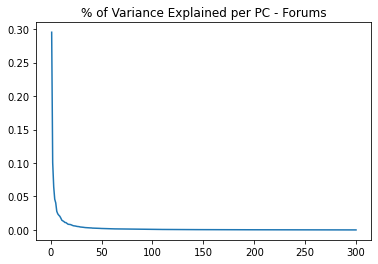

In [ ]:
explvar_dia = pca_col.explained_variance_ratio_
plt.title("% of Variance Explained per PC - Forums")
sns.lineplot(range(1, len(explvar_dia)+1), explvar_dia)
plt.show()

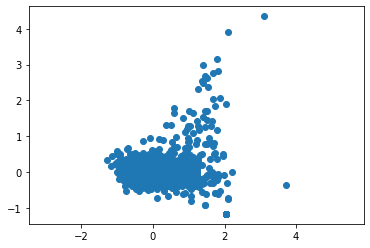

In [ ]:
xs = pcs_col[:,0]

# Assign 1st column of pca_features: ys
ys = pcs_col[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

